In [ ]:
#libraries

#!pip install jupyter-dash
import numpy as np      # For numerical operations
import pandas as pd    #For data manipulation and analysis
import seaborn as sns  # For enhanced data visualization
import matplotlib.pyplot as plt # For data visualization
%matplotlib inline
import plotly.express as px # For interactive and expressive data visualization


import numpy as np

# data processing
import pandas as pd


# data visualization
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Student academic dataset

In [ ]:
# Reading Student_academic data
df=pd.read_csv('Student_academic.csv') #creating a data frame


## Explore the data


## Info on Dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
Number_Rows, Number_Cols = df.shape
print(f"DataFrame contains {Number_Rows} rows & {Number_Cols} Columns")

DataFrame contains 4424 rows & 35 Columns


## Samples


In [ ]:
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [ ]:
null_count = df.isnull().sum()
print("Number of null values in each column:")
print(null_count)

Number of null values in each column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International             

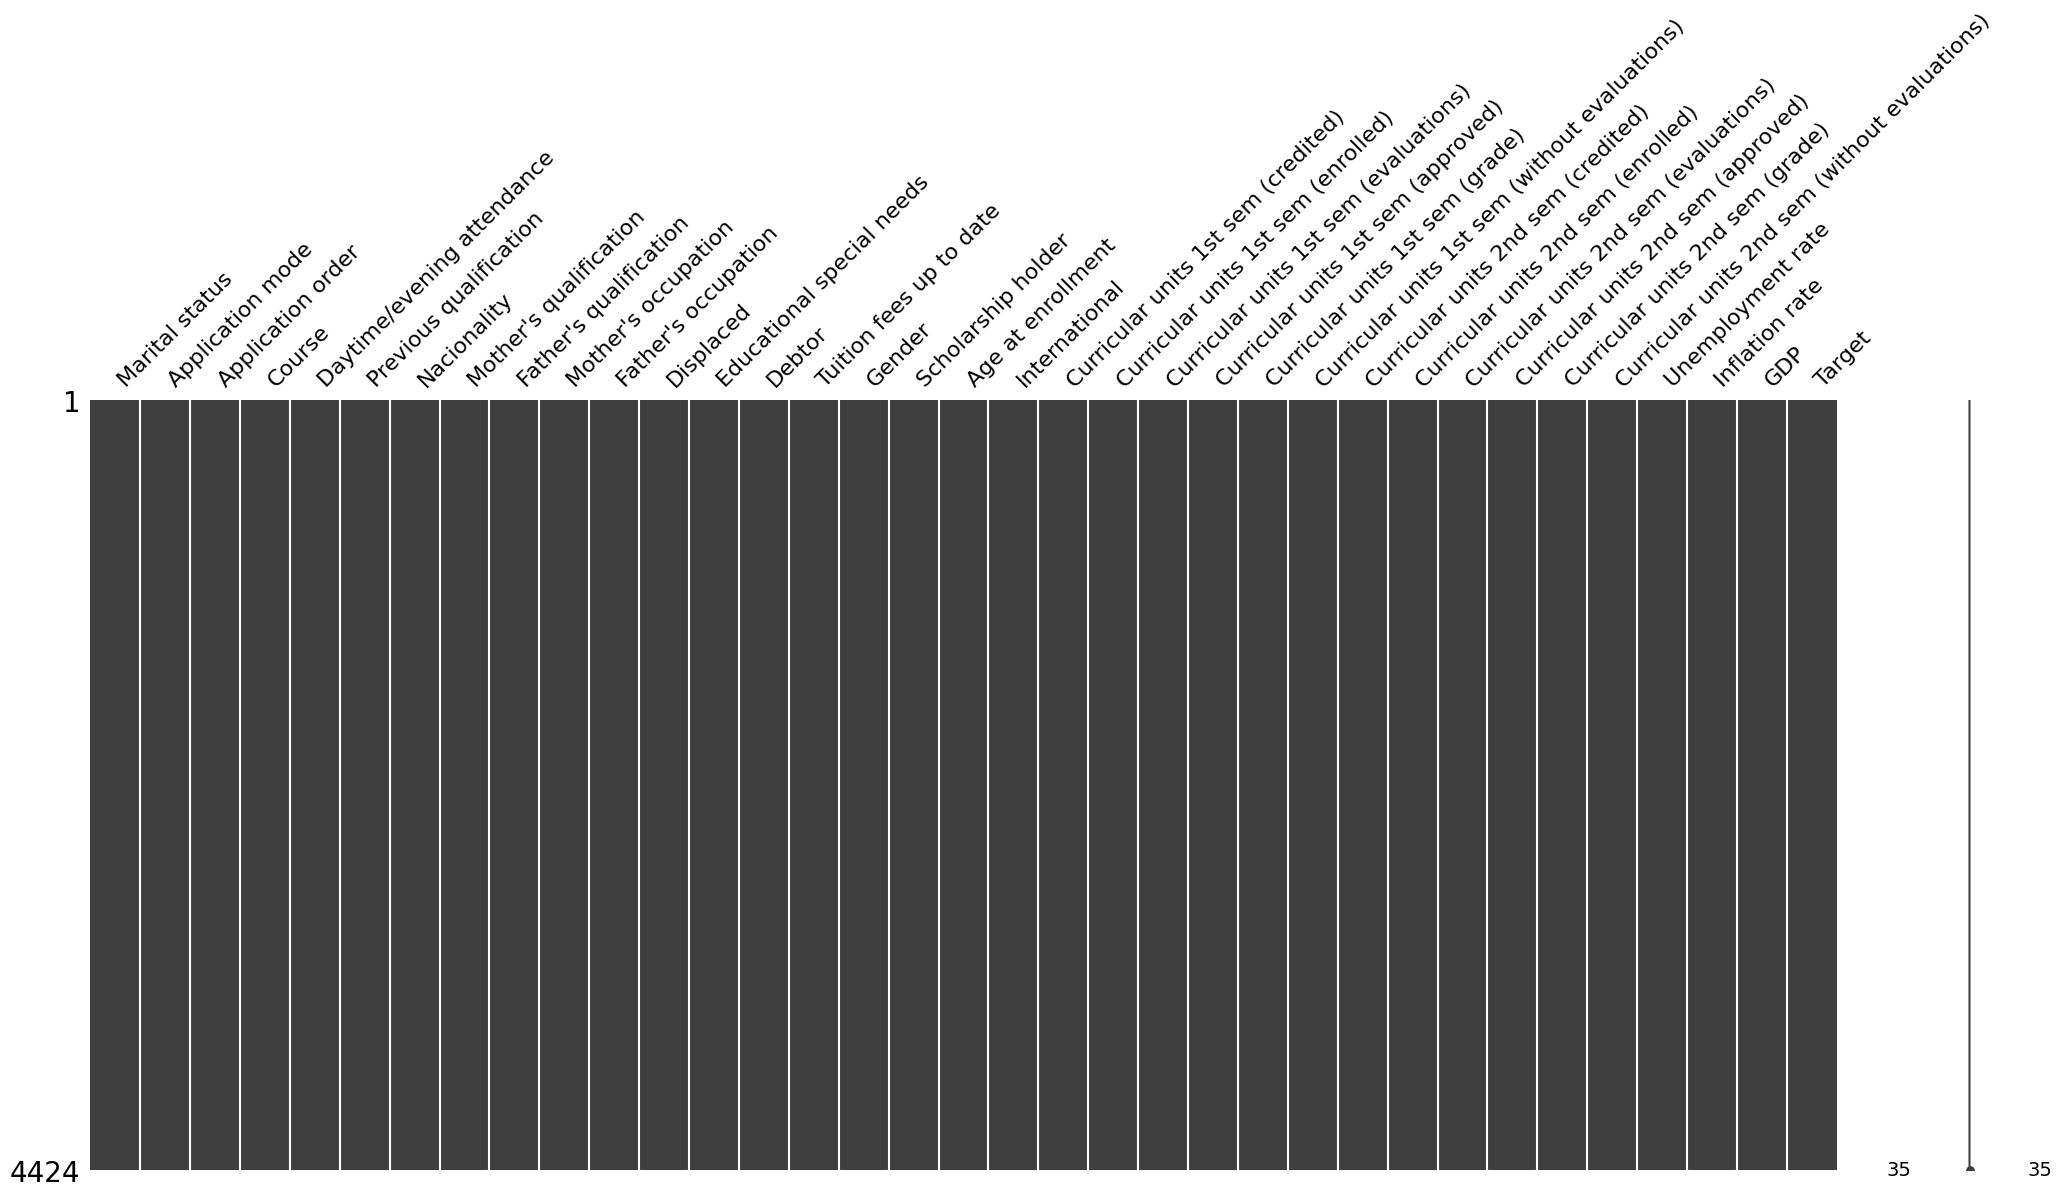

In [ ]:
#Visualize missing values
import missingno as msno
msno.matrix(df);

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

## Dataset Columns


In [ ]:
#  Dataset Columns
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
df_copy = df.copy()

label_encoder = LabelEncoder()
df_copy['Target'] = label_encoder.fit_transform(df_copy['Target'])

corr_matrix = df_copy.corr()


# Extract the correlation values with the target column
target_correlation = corr_matrix['Target'].drop('Target')

# Sort the correlations in descending order
sorted_correlations = target_correlation.abs().sort_values(ascending=False)

# Print the correlations
print(sorted_correlations)

Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Age at enrollment                                 0.243438
Debtor                                            0.240999
Gender                                            0.229270
Application mode                                  0.212025
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (without evaluations)    0.094028
Curricular units 2nd sem (evaluations)            0.092721
Previous qualification                            0.091365
Marital status                                    0.0898

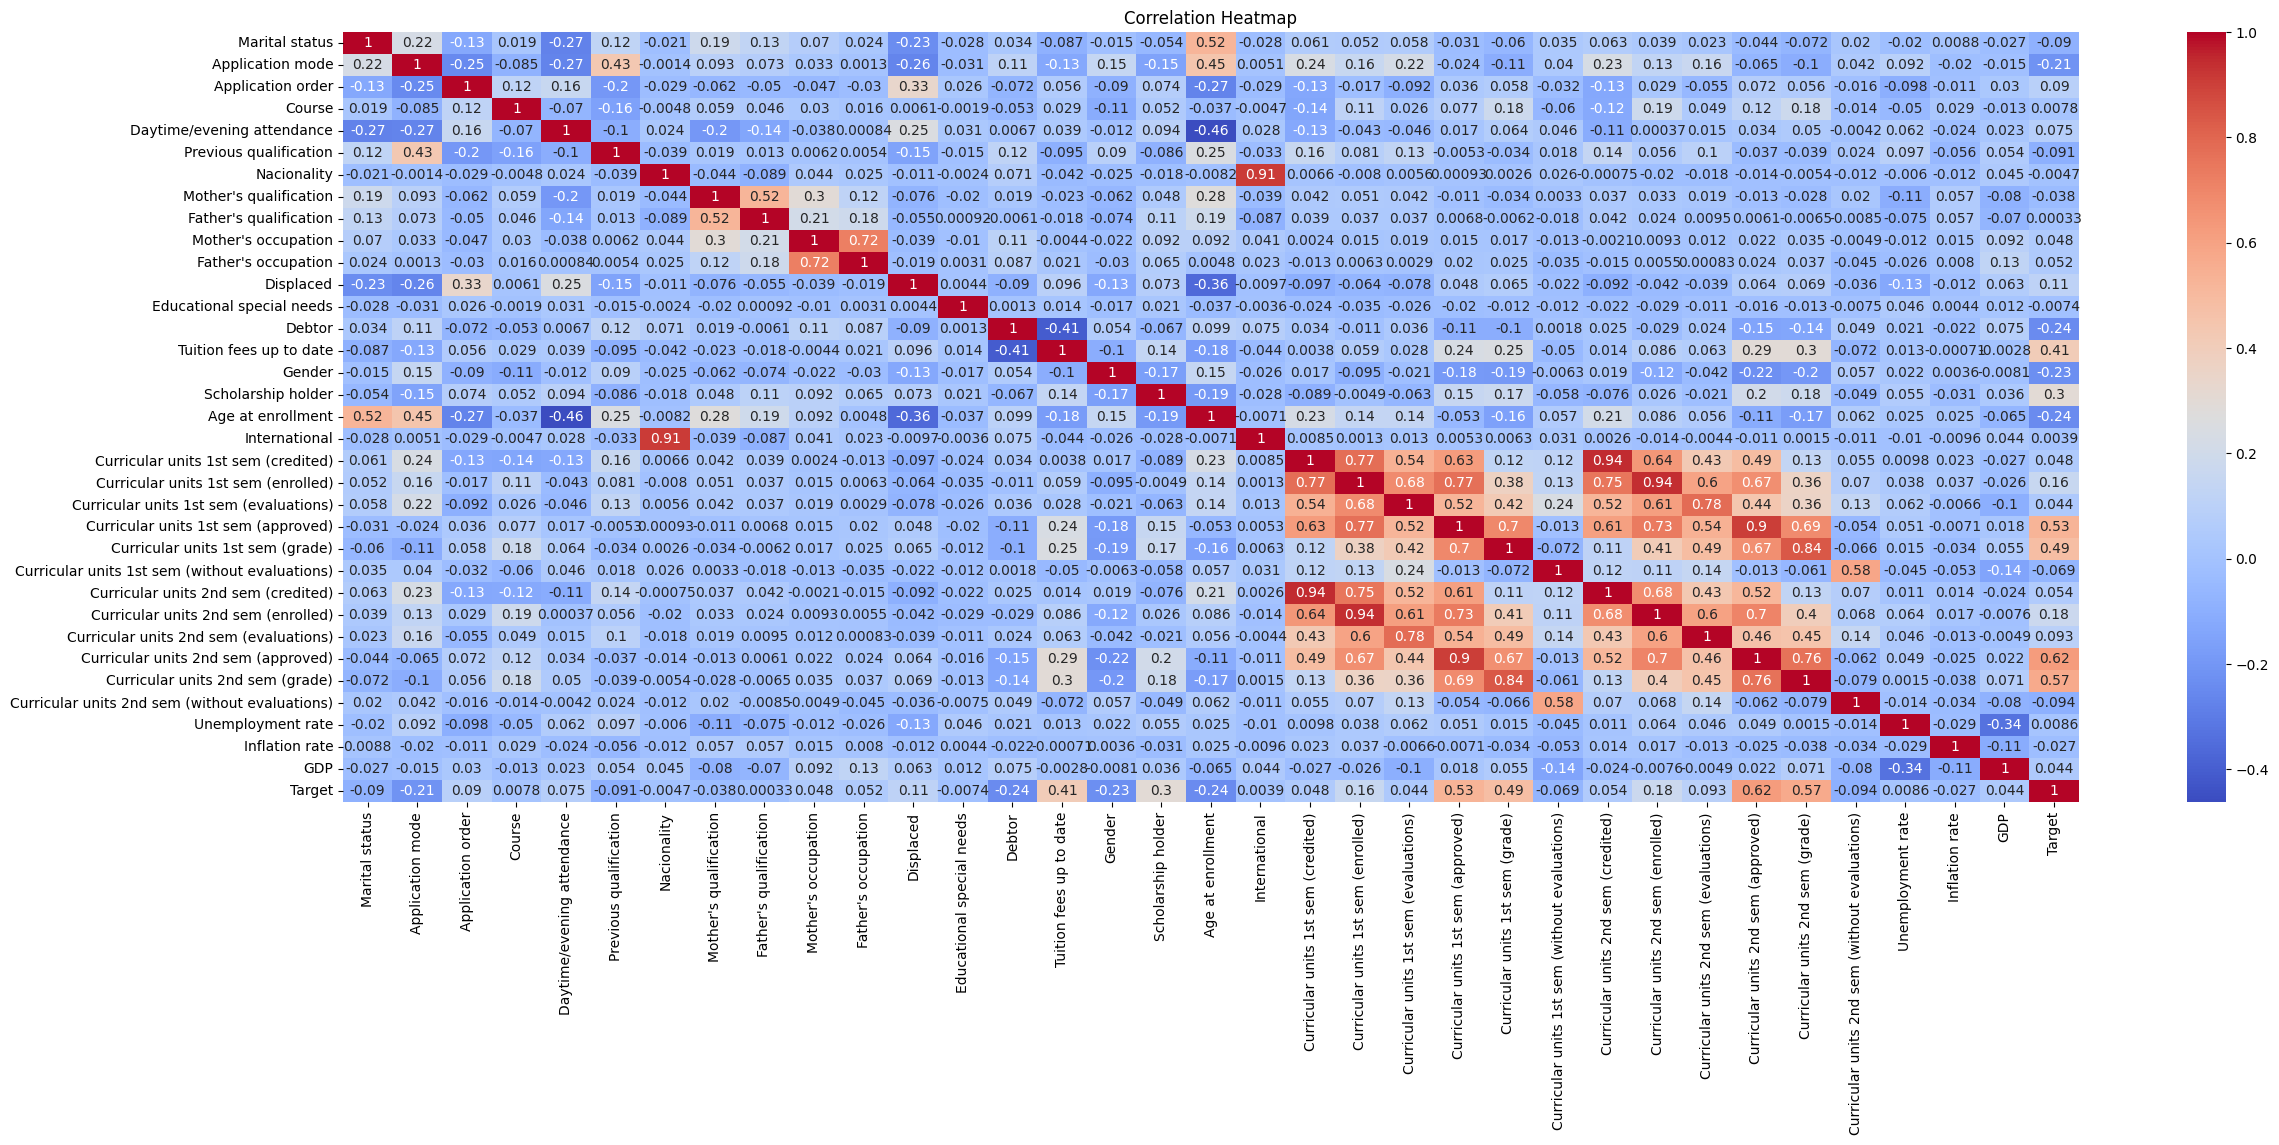

In [ ]:
plt.figure(figsize=(28, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## Selecte desired columns for our EDA



In [ ]:
Selected_col_=[ 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Tuition fees up to date', 'Age at enrollment',
               'Debtor','Gender','Application mode' , 'Scholarship holder','Target']


Selected_col=['Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)',
              'Curricular units 2nd sem (approved)','Tuition fees up to date','Target']
#selecteddf=df[selected]
#corr_matrix = selecteddf.corr()

# Sort the correlations with the target variable in descending order
#target_correlations = selecteddf['Target'].sort_values(ascending=False)

# Print the correlation values

#print(target_correlations)

S_df = df[Selected_col]
S_df_without_enrolled = S_df[S_df['Target'] != 'Enrolled']
S_df_without_enrolled


,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Tuition fees up to date,Target
0,0.000000,0.000000,0,0,1,Dropout
1,14.000000,13.666667,6,6,0,Graduate
2,0.000000,0.000000,0,0,0,Dropout
3,13.428571,12.400000,6,5,1,Graduate
4,12.333333,13.000000,5,6,1,Graduate
...,...,...,...,...,...,...
4419,13.600000,12.666667,5,5,1,Graduate
4420,12.000000,11.000000,6,2,0,Dropout
4421,14.912500,13.500000,7,1,1,Dropout
4422,13.800000,12.000000,5,5,1,Graduate


# Percentage wise Target Variable

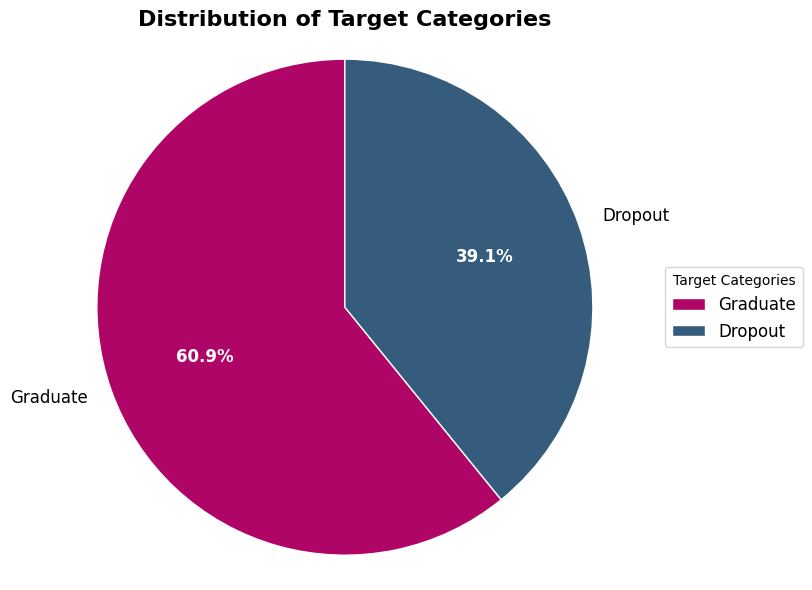

In [ ]:
import matplotlib.pyplot as plt

# Compute the counts of each target category
target_counts = S_df_without_enrolled['Target'].value_counts()

# Define custom colors for the pie chart '#6C5B7B', '#C06C84', '#FFC857',
colors = [ '#AF0567', '#355C7D']

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(target_counts, labels=target_counts.index, colors=colors,
                                  autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                  textprops={'fontsize': 12, 'color': 'black'})

# Set font weight and color for percentage labels
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('white')

# Add a title
ax.set_title('Distribution of Target Categories', fontsize=16, fontweight='bold')

# Equal aspect ratio to make the pie chart a circle
ax.axis('equal')

# Remove unnecessary spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

# Remove y-axis label
ax.set_ylabel('')

# Increase the distance between the pie chart and the legend
ax.legend(wedges, target_counts.index, title='Target Categories', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler"""

""" scaler = MinMaxScaler()
num_feats = df[['Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Unemployment rate', 'Target','Scholarship holder']]
num_scaled = scaler.fit_transform(num_feats)"""

"""num_feats = S_df_without_enrolled"""
"""std_scaler = StandardScaler()
num_std = std_scaler.fit_transform(num_feats)"""
"""
num_feats_WT = S_df_without_enrolled.drop('Target', axis=1)  # Drop the 'Target' column

scaler = MinMaxScaler()
num_std = scaler.fit_transform(num_feats_WT)
# The output of the scaler is a NumPy array. You can convert it back to a Pandas DataFrame.

num_scaled_df = pd.DataFrame(num_std, columns=num_feats_WT.columns)
num_scaled_df['Target'] = num_feats['Target']
num_scaled_df.head(5)"""


"""


In [ ]:
S_df_without_enrolled.describe()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Tuition fees up to date
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,10.534860,10.036155,4.791460,4.518457,0.866116
std,5.057694,5.481742,3.237845,3.162376,0.340575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,10.517857,3.000000,2.000000,1.000000
50%,12.341429,12.333333,5.000000,5.000000,1.000000
75%,13.500000,13.500000,6.000000,6.000000,1.000000
max,18.875000,18.571429,26.000000,20.000000,1.000000


<Axes: >

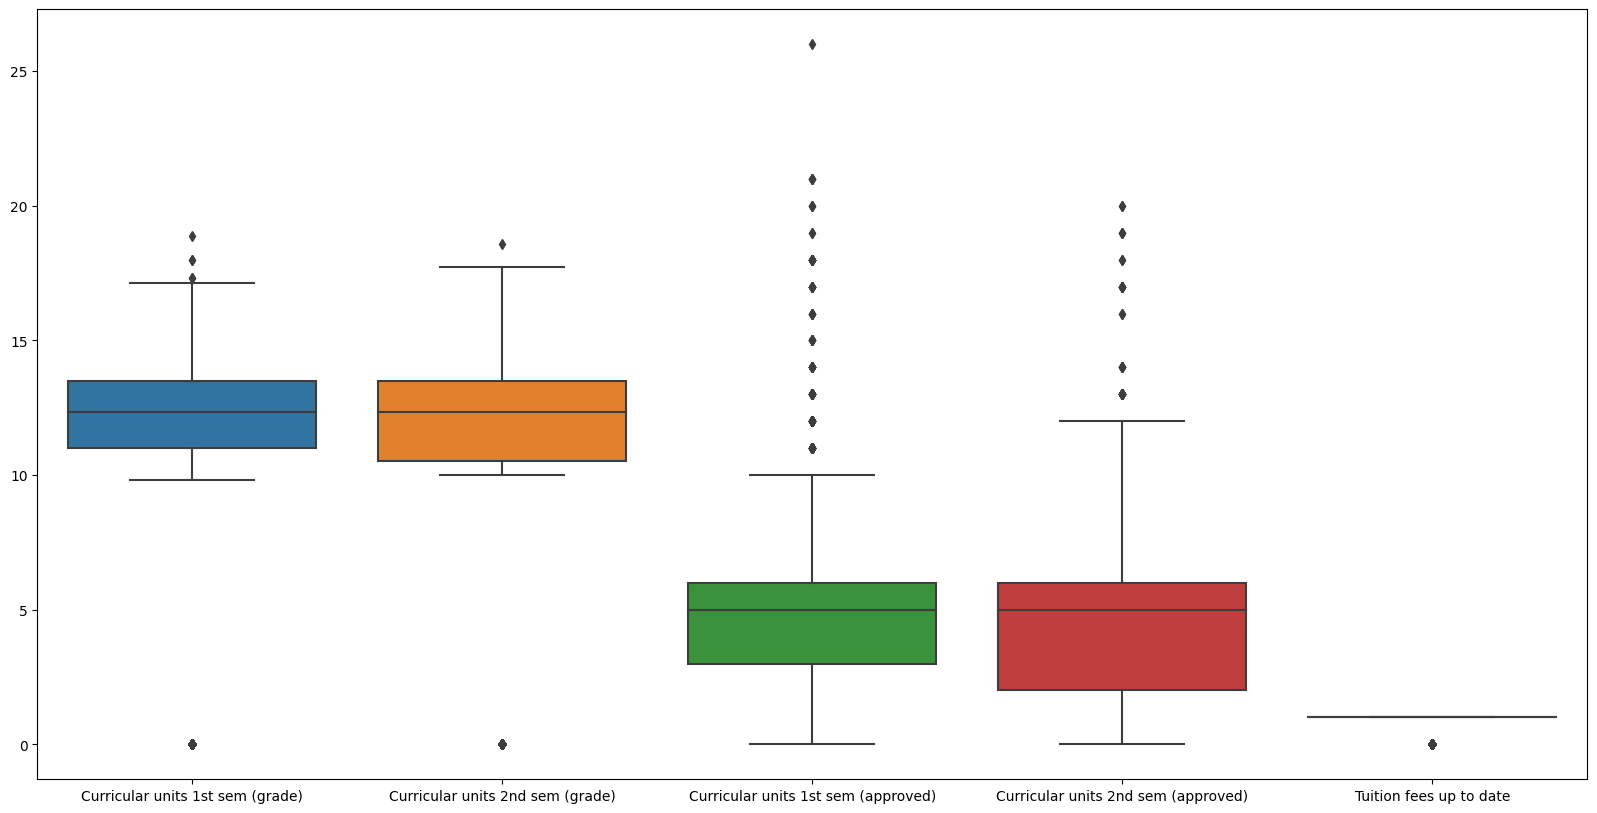

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=S_df_without_enrolled)

In [ ]:
Number_Rows, Number_Cols = S_df_without_enrolled.shape
print(f"DataFrame contains {Number_Rows} rows & {Number_Cols} Columns")

DataFrame contains 3630 rows & 6 Columns


In [ ]:
Q1 = S_df_without_enrolled.quantile(0.25)
Q3 = S_df_without_enrolled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Curricular units 1st sem (grade)       2.500000
Curricular units 2nd sem (grade)       2.982143
Curricular units 1st sem (approved)    3.000000
Curricular units 2nd sem (approved)    4.000000
Tuition fees up to date                0.000000
dtype: float64


In [ ]:
df = S_df_without_enrolled[~((S_df_without_enrolled < (Q1 - 1.5 * IQR)) |(S_df_without_enrolled > (Q3 + 1.5 * IQR))).any(axis=1)]


Number_Rows, Number_Cols = df.shape
print(f"DataFrame contains {Number_Rows} rows & {Number_Cols} Columns")

DataFrame contains 2425 rows & 6 Columns


In [ ]:
from sklearn.preprocessing import LabelEncoder
""" Manual Way coding labels

df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

or

df.replace("Dropout",0,inplace=True)
df.replace("Enrolled",1,inplace=True)
df.replace("Graduate",2,inplace=True)

"""
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])
df

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Tuition fees up to date,Target
3,13.428571,12.400000,6,5,1,1
4,12.333333,13.000000,5,6,1,1
5,11.857143,11.500000,5,5,1,1
6,13.300000,14.345000,7,8,1,1
8,13.875000,14.142857,6,6,1,1
...,...,...,...,...,...,...
4418,12.500000,13.142857,6,7,1,1
4419,13.600000,12.666667,5,5,1,1
4421,14.912500,13.500000,7,1,1,0
4422,13.800000,12.000000,5,5,1,1


In [ ]:
final_data_features = df.drop('Target', axis=1)
labels = df['Target']
print (final_data_features.shape)
print(labels.shape)

(2425, 5)
(2425,)


In [ ]:
"""from sklearn.decomposition import PCA

pca=PCA(.95)
pca.fit_transform(final_data_features)
pca.n_components_"""

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split  data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data_features, labels, test_size=0.2, random_state=0)



"""
# Apply PCA to the feature matrix
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)"""

'\n# Apply PCA to the feature matrix\npca = PCA(n_components=3)\nX_train_pca = pca.fit_transform(X_train)\nX_test_pca = pca.transform(X_test)'

# Logistic Regression

In [ ]:
logreg = LogisticRegression()


logreg.fit(X_train, y_train)

# Make predictions
y_pred_1 = logreg.predict(X_test)

y_pred_binary = (y_pred_1 > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_log=round(accuracy * 100, 2)
# Evaluate the model

print(acc_log)

89.28


# Naive Bayes

In [ ]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

y_pred_2 = gaussian.predict(X_test)

y_pred_binary = (y_pred_2 > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_gaussian=round(accuracy * 100, 2)

print(acc_gaussian)

88.25


# Decision Tree

In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred_3=decisiontree.predict(X_test)

y_pred_binary = (y_pred_3 > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_dt=round(accuracy * 100, 2)
print(acc_dt)

85.15


# Linear SVC (Support Vector Classifier)

In [ ]:
svc=LinearSVC()
svc.fit(X_train,y_train)
y_pred_4=svc.predict(X_test)
y_pred_binary = (y_pred_4 > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_svc=round(accuracy * 100, 2)

print(acc_svc)

89.07


# Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create an instance of the RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0)

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameter combination and the corresponding R2 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameter Combination:", best_params)
print("Best R2 Score:", best_score)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

random_forest = RandomForestRegressor(max_depth= 10, max_features ='sqrt', min_samples_leaf= 2, min_samples_split= 10, n_estimators = 200, random_state=0)
random_forest.fit(X_train, y_train)
y_pred_5 = random_forest.predict(X_test)
y_pred_binary = (y_pred_5 > 0.5).astype(int)

#mae = mean_absolute_error(y_test, y_pred_5)

accuracy = accuracy_score(y_test, y_pred_binary)

#mse = mean_squared_error(y_test, y_pred_5)
#acc_random_forest = round(mse,4)
acc_random_forest = round(accuracy*100,2)

print(acc_random_forest)


90.52


# K Nearest Neighbours


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1,2,3,4,5,7,8,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter combination and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameter Combination:", best_params)
print("Best Accuracy Score:", best_score)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#y_train = (y_train > 0.5).astype(int)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred_6 = knn.predict(X_test)
y_pred_binary = (y_pred_6 > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
acc_knn = round(accuracy*100,2)



print(acc_knn)

90.1


In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC','KNN'
              ],
    'Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc, acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
Random Forest,90.52
KNN,90.10
Logistic Regression,89.28
LinearSVC,89.07
gaussian,88.25
Decision Tree,85.15


True Negative (TN): The model correctly predicted a sample as negative, and it actually belongs to the negative class.

True Positive (TP): The model correctly predicted a sample as positive, and it actually belongs to the positive class.


False Positive (FP): The model incorrectly predicted a sample as positive, but it actually belongs to the negative class.

False Negative (FN): The model incorrectly predicted a sample as negative, but it actually belongs to the positive class.


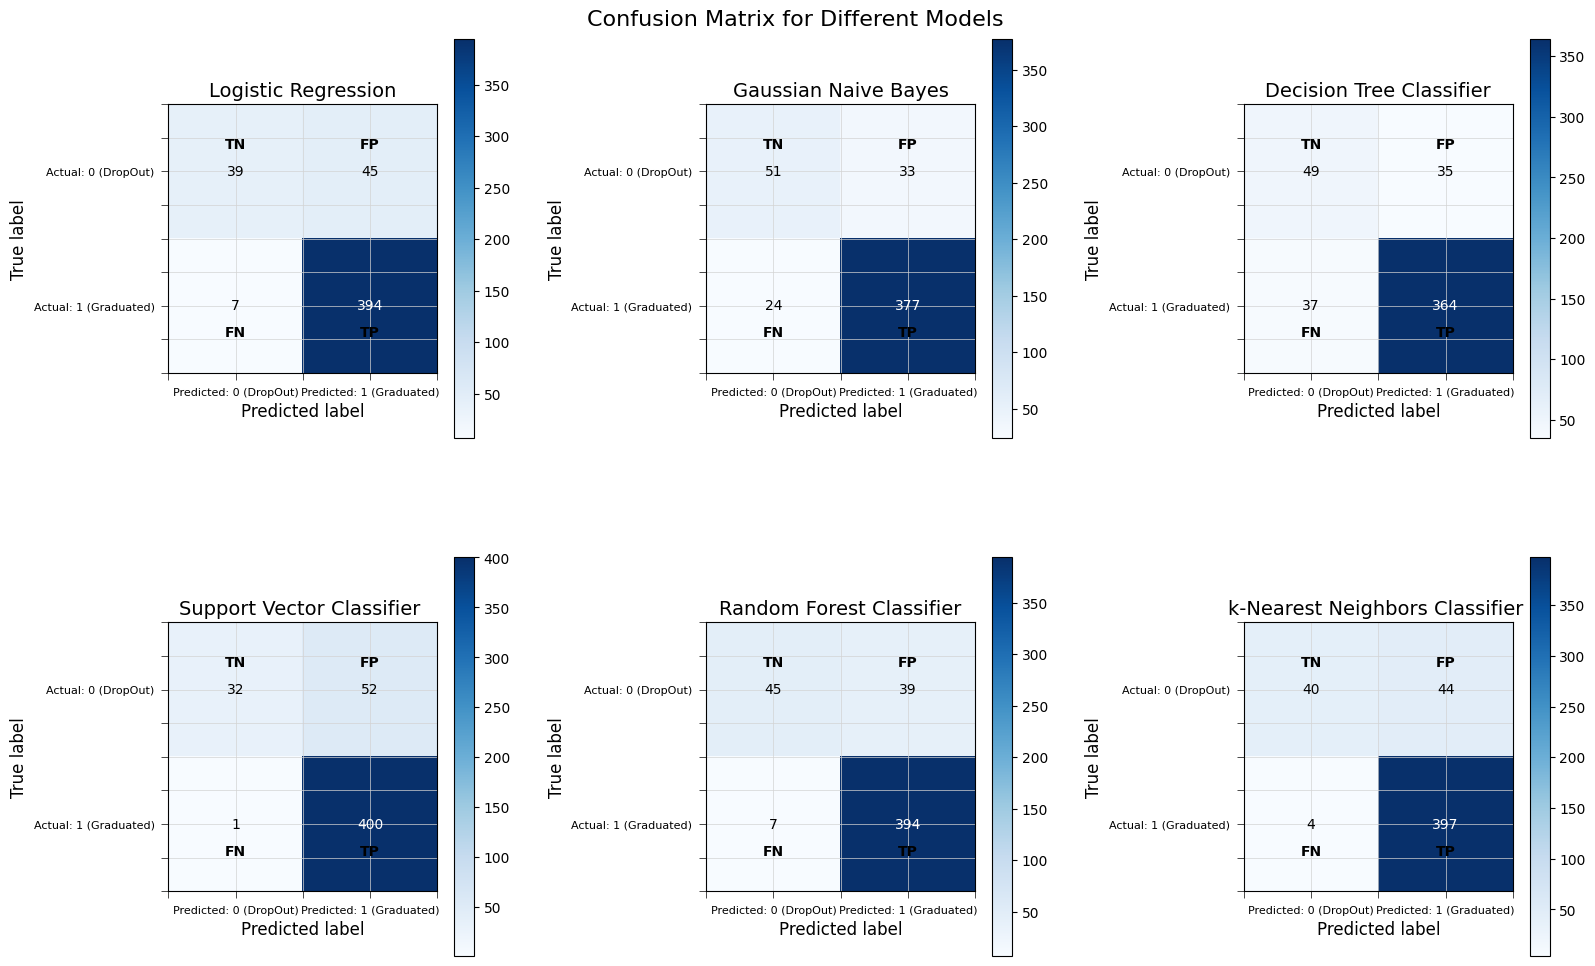

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': logreg,
    'Gaussian Naive Bayes': gaussian,
    'Decision Tree Classifier': decisiontree,
    'Support Vector Classifier ': svc,
    'Random Forest Classifier': random_forest,
    'k-Nearest Neighbors Classifier ': knn
}

# Create an empty dictionary to store confusion matrices
confusion_matrices = {}

# Compute confusion matrix for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred_binary)
    confusion_matrices[model_name] = cm

# Plot confusion matrix for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle('Confusion Matrix for Different Models', fontsize=16)

for ax, (model_name, cm) in zip(axes.flat, confusion_matrices.items()):
    # Plot the confusion matrix
    im = ax.imshow(cm, cmap='Blues')

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(model_name, fontsize=14)
    ax.xaxis.set_ticklabels([' ', 'Predicted: 0 (DropOut)','  ', 'Predicted: 1 (Graduated)', ''], fontsize=8)
    ax.yaxis.set_ticklabels([' ',' ', 'Actual: 0 (DropOut)',' ', ' ',' ','Actual: 1 (Graduated)', ''], fontsize=8)
    ax.xaxis.set_tick_params(width=0.5, length=5, pad=5)
    ax.yaxis.set_tick_params(width=0.5, length=5, pad=5)

    # Add TP, TN, FP, FN text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center',
                    color='white' if cm[i, j] > cm.max() / 2 else 'black')

    # Display grid
    ax.grid(visible=True, color='lightgray', linewidth=0.5)

    # Add TP, TN, FP, FN labels inside the plot box
    ax.text(0.25, 0.85, 'TN', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)
    ax.text(0.75, 0.85, 'FP', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)
    ax.text(0.25, 0.15, 'FN', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)
    ax.text(0.75, 0.15, 'TP', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)

# Adjust the layout and spacing
fig.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.6)

# Show the plot
plt.show()


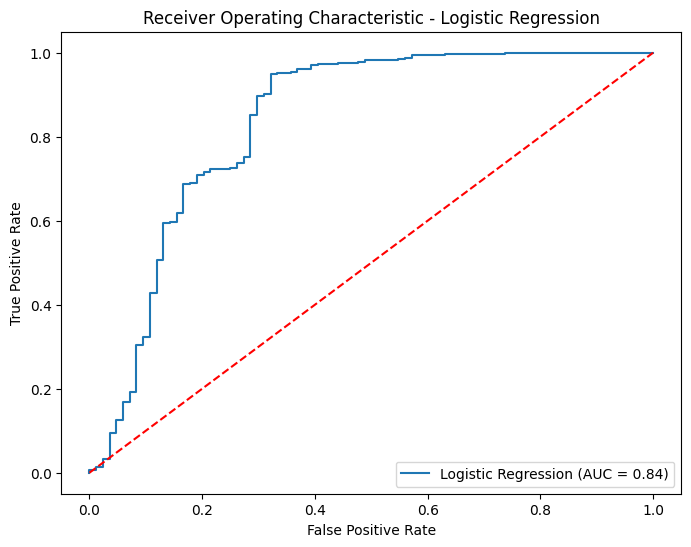

Logistic Regression ROC AUC: 0.84


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for the Logistic Regression model
y_scores = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot
plt.show()

# Print ROC AUC score
print('Logistic Regression ROC AUC: {:.2f}'.format(roc_auc))



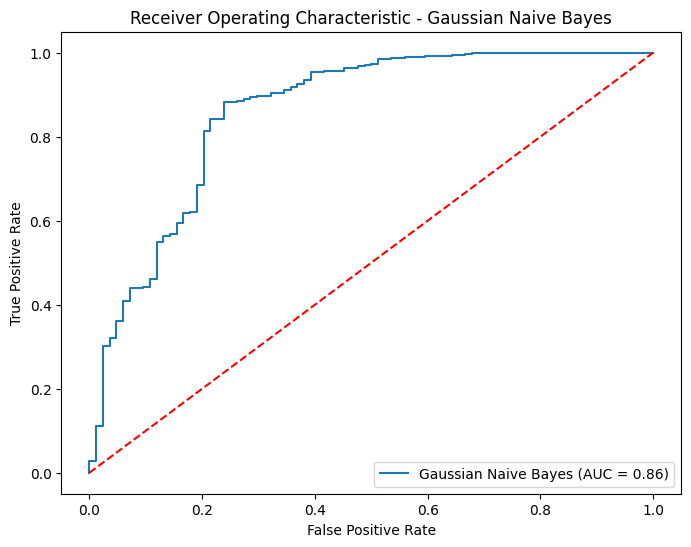

Gaussian Naive Bayes ROC AUC: 0.86


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for the Logistic Regression model
y_scores = gaussian.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()

# Print ROC AUC score
print('Gaussian Naive Bayes ROC AUC: {:.2f}'.format(roc_auc))

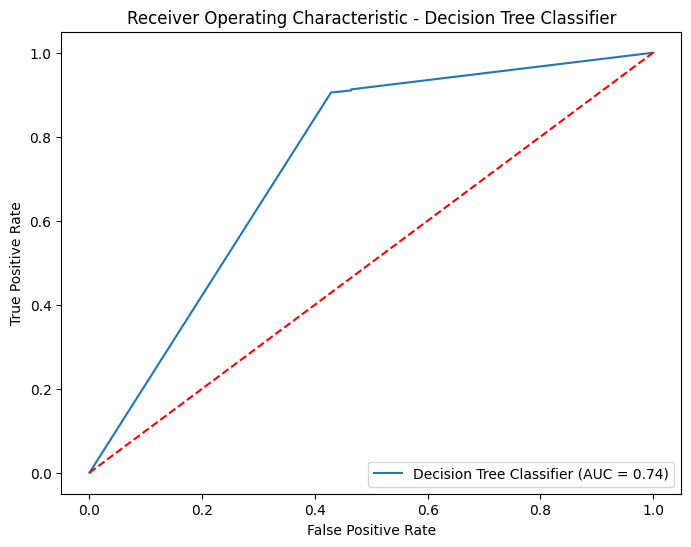

Decision Tree Classifier ROC AUC: 0.74


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for the Logistic Regression model
y_scores = decisiontree.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree Classifier (AUC = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()

# Print ROC AUC score
print('Decision Tree Classifier ROC AUC: {:.2f}'.format(roc_auc))

In [ ]:
from sklearn.metrics import roc_auc_score

# Compute predicted values for the regression model
y_pred = decisiontree.predict(X_test)

# Compute AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print AUROC score
print('AUROC score: {:.2f}'.format(auroc))


AUROC score: 0.66


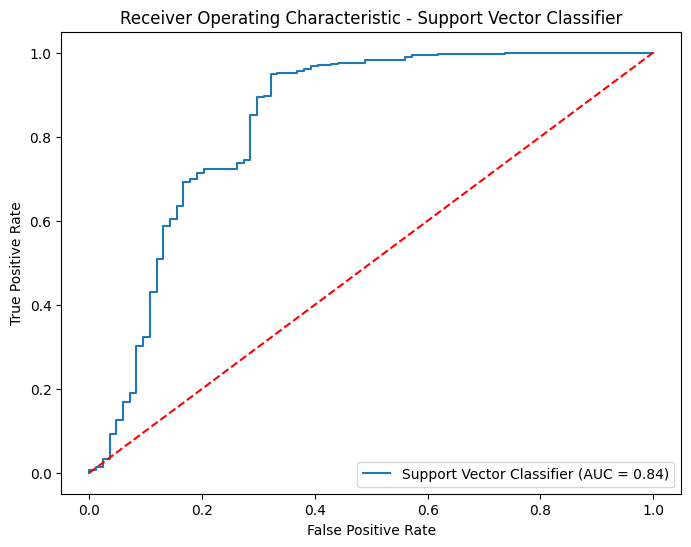

Support Vector Classifier ROC AUC: 0.84


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for theSupport Vector Classifier model


y_scores = svc.decision_function(X_test)

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Support Vector Classifier (AUC = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic - Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()

# Print ROC AUC score
print('Support Vector Classifier ROC AUC: {:.2f}'.format(roc_auc))

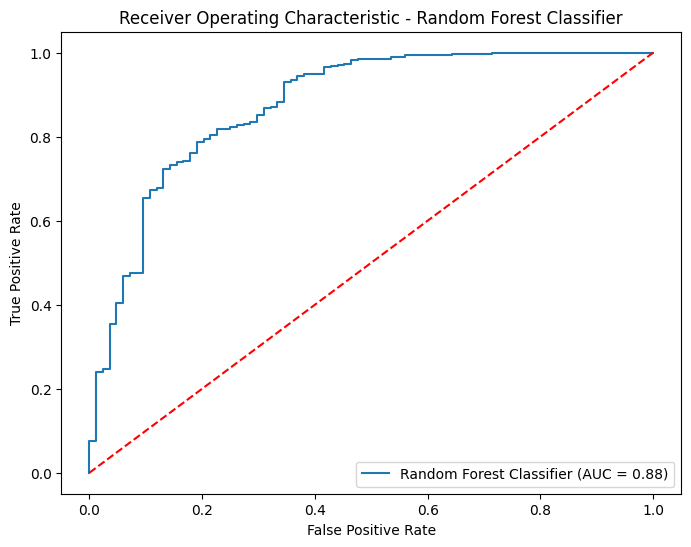

Random Forest Classifier ROC AUC: 0.88


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for the Random Forest Classifier model

y_pred = random_forest.predict(X_test)

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest Classifier (AUC = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot

plt.show()

# Print ROC AUC score
print('Random Forest Classifier ROC AUC: {:.2f}'.format(roc_auc))

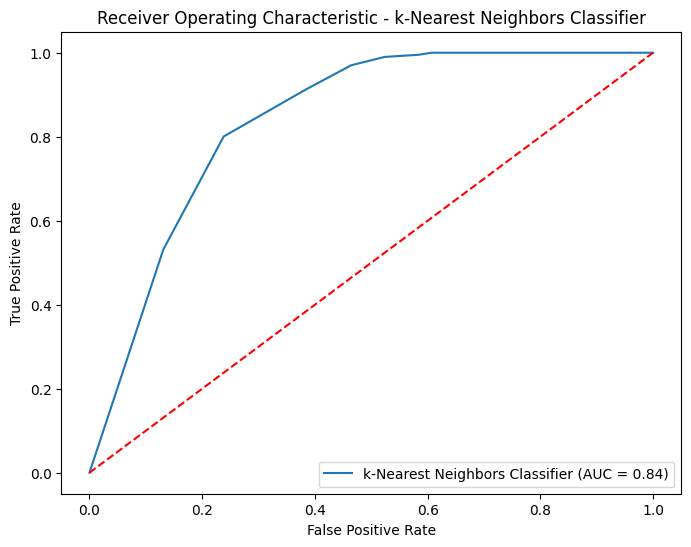

k-Nearest Neighbors Classifier ROC AUC: 0.84


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities for the k-Nearest Neighbors Classifier model
y_scores = knn.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='k-Nearest Neighbors Classifier (AUC = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic - k-Nearest Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()

# Print ROC AUC score
print('k-Nearest Neighbors Classifier ROC AUC: {:.2f}'.format(roc_auc))